In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [126]:
!pip install --upgrade caer canaro

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [142]:
import os
import caer
import canaro
import numpy as np
import cv2 as cv
import gc

In [143]:
IMG_SIZE = (80,80)
channels = 1
char_path = r'../input/the-simpsons-characters-dataset/simpsons_dataset'

In [145]:
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path,char)))

# Sort in descending order
char_dict = caer.sort_dict(char_dict, descending=True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [146]:
characters = []
count = 0
for i in char_dict:
    characters.append(i[0])
    count += 1
    if count >= 10:
        break
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [147]:
train = caer.preprocess_from_dir(char_path, characters, channels=channels, IMG_SIZE=IMG_SIZE, isShuffle=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 0.6094605922698975s
[INFO] At 1000 files
[INFO] 1454 files found in 0.17970800399780273s
[INFO] At 1000 files
[INFO] 1452 files found in 0.17930030822753906s
[INFO] At 1000 files
[INFO] 1354 files found in 0.12740588188171387s
[INFO] At 1000 files
[INFO] 1342 files found in 0.12236785888671875s
[INFO] At 1000 files
[INFO] 1291 files found in 0.09204363822937012s
[INFO] At 1000 files
[INFO] 1206 files found in 0.03890109062194824s
[INFO] At 1000 files
[INFO] 1194 files found in 0.032868385314941406s
[INFO] At 1000 files
[INFO] 1193 files found in 0.028495073318481445s
[INFO] At 1000 files
[INFO] 1079 files found in 0.005300760269165039s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 1m 2s


In [148]:
len(train)

13811

<function matplotlib.pyplot.show(close=None, block=None)>

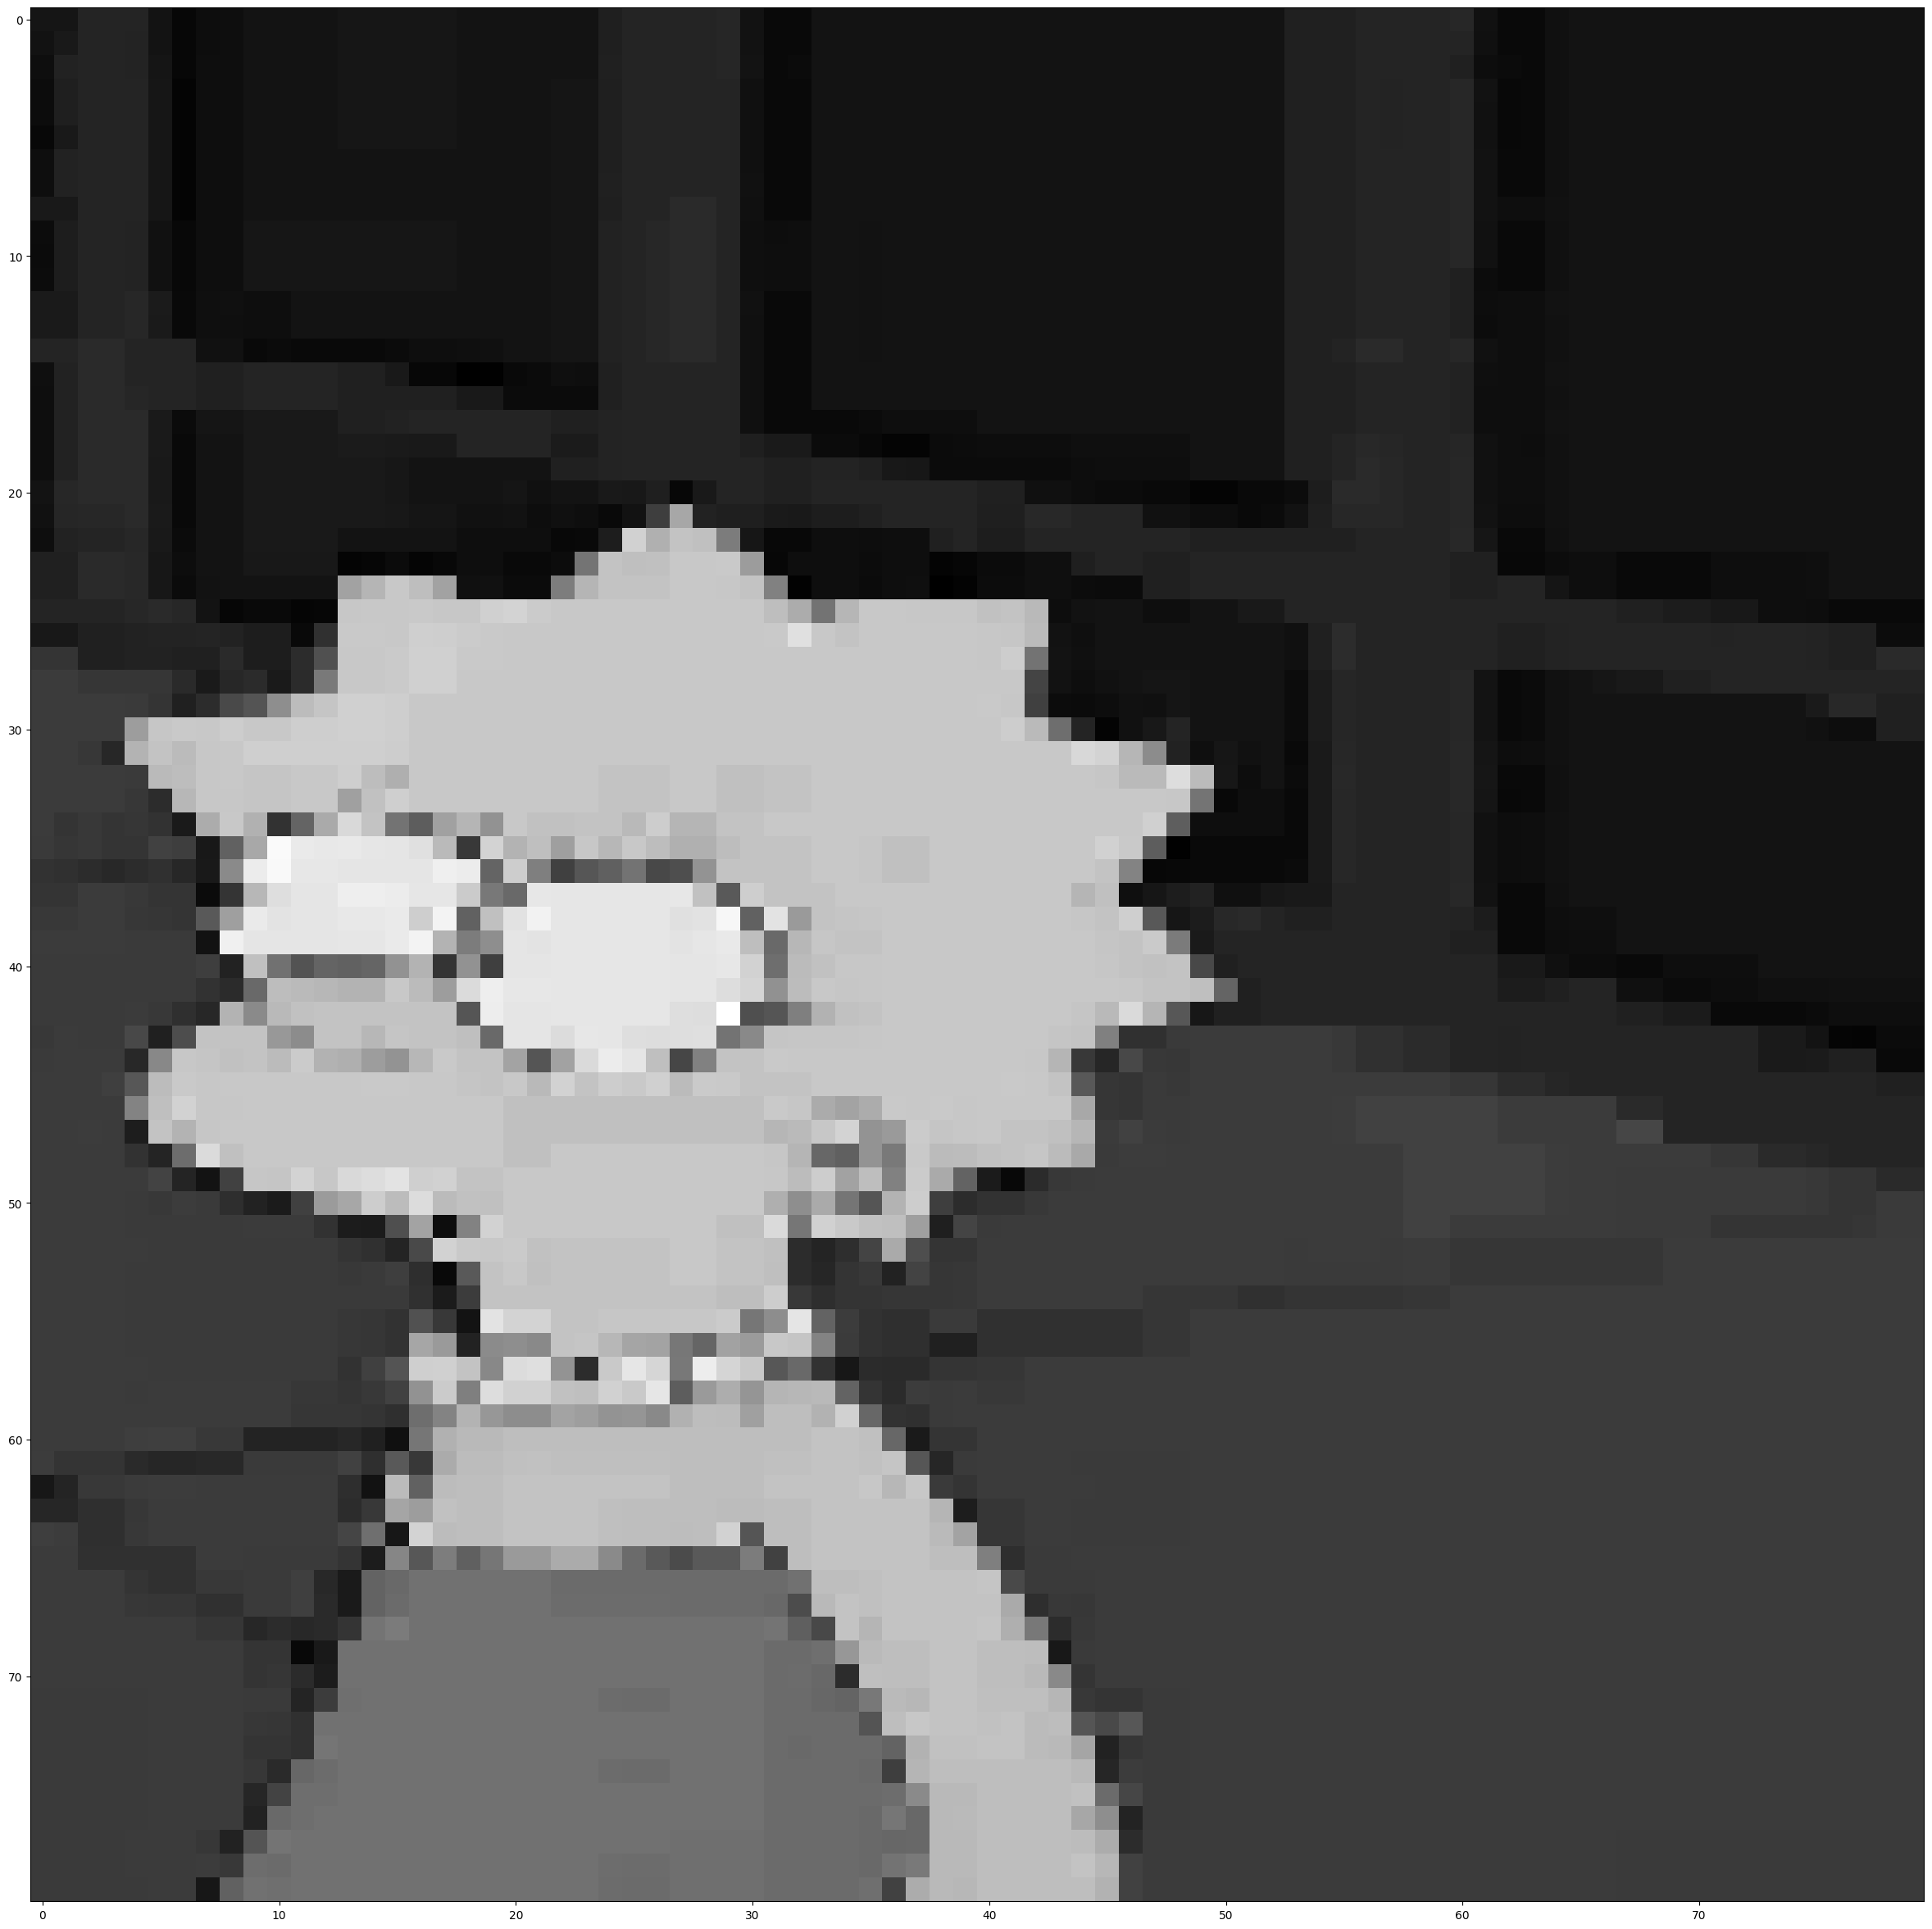

In [149]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[0][0], cmap='gray')
plt.show


In [150]:
featureSet, labels = caer.sep_train(train, IMG_SIZE=IMG_SIZE)

In [151]:
from tensorflow.keras.utils import to_categorical
featureSet=caer.normalize(featureSet)
labeel=to_categorical(labels,len(characters))

In [152]:
x_train,x_val,y_train,y_val=caer.train_val_split(featureSet,labels,val_ratio=0.2)

In [156]:
del train
del featureSet
del labels
gc.collect()

0

In [153]:
BATCH_SIZE=32
EPOCHS=10

In [154]:
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

In [155]:
def createSimpsonsModel(IMG_SIZE, channels, output_dim, loss='binary_crossentropy', learning_rate=0.001, momentum=0.9, nesterov=True):
    # Your existing model creation code...
    optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=learning_rate, momentum=momentum, nesterov=nesterov)
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    model.summary()  # Call summary here
    return model


In [ ]:
num_characters = 8198

created_model = createSimpsonsModel(IMG_SIZE, channels, output_dim=num_characters, loss='binary_crossentropy', learning_rate=0.001, momentum=0.9, nesterov=True)

created_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.001, momentum=0.9, nesterov=True), metrics=['accuracy'])

from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]
training = created_model.fit(train_gen,
                    steps_per_epoch=len(x_train)//BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_val,y_val),
                    validation_steps=len(y_val)//BATCH_SIZE,
                    callbacks = callbacks_list)


In [ ]:
characters